![alt text](images/7.2-7.1.png)
![alt text](images/7.2-7.2.png)

In [1]:
from helper import *

samples = load_sample_data(7,2,7, display=True)
xSamples = np.zeros(np.shape(samples), dtype=float)
ySamples = np.zeros(np.shape(samples), dtype=float)

# Strip values to approiate sample distribution
for i in range(len(samples)):
    # print(samples[i], "X:", float(samples[i][:4]), "Y:", float(samples[i][-4:]),type(samples[i]))
    xSamples[i] = float(samples[i][:4])
    ySamples[i] = float(samples[i][-4:])
    
xSamples, ySamples

Loaded E7_2-07.txt sucessfully.
['28.8\t14.1' '24.4\t12.2' '30.1\t14.0' '25.6\t14.6' '26.4\t8.5'
 '23.9\t12.6' '22.1\t13.7' '22.5\t14.8' '27.6\t14.1' '28.1\t13.2'
 '20.8\t12.1' '27.7\t11.4' '24.4\t10.1' '25.1\t14.2' '24.6\t13.6'
 '26.3\t13.1' '28.2\t11.9' '22.2\t14.8' '26.3\t11.1' '24.4\t13.5']


(array([28.8, 24.4, 30.1, 25.6, 26.4, 23.9, 22.1, 22.5, 27.6, 28.1, 20.8,
        27.7, 24.4, 25.1, 24.6, 26.3, 28.2, 22.2, 26.3, 24.4]),
 array([14.1, 12.2, 14. , 14.6,  8.5, 12.6, 13.7, 14.8, 14.1, 13.2, 12.1,
        11.4, 10.1, 14.2, 13.6, 13.1, 11.9, 14.8, 11.1, 13.5]))

# $A)$ Does the current wire meet the customer's specifications? <br/> Meaning is the expected minimum force atleast 20 pounds.

# So let's find the Lower Bound one-sided confidence interval for $\bar{X}$ to represent the $\mu_X$

In [8]:
xBar = sample_mean(xSamples)
xStd = sample_variance(xSamples) ** .5
t = scipy.stats.t.ppf(.95, len(xSamples) -1)

lowerBound = xBar - t * (xStd/(n **.5))
lowerBound

24.510881443856213

## Yes lowerbound of $\mu_X \approx 25.511$ with $95\%$ confidence <br/> 



# $B)$ Find a 90% confidience interval for the difference of the menas for the two samples

# Off the back we know <br/> 1. That $\sigma_X$  and $\sigma_Y$ are unknown <br/> 2. $n$ and $m$ < 30 <br/><br/> So let's use the T distribution!

In [11]:
lowerBound, upperBound = t_confidence_Interval_Difference_Of_Means(xSamples, ySamples, 90)
print(f"[{lowerBound}, {upperBound}]")

Converting confidence interval to 0.9
[11.465518125574235, 13.724481874425763]


# $C)$ Construct a box and whisker plot of the two sets of wires on the same figure

In [41]:
xSamples.sort()
xMin = xSamples.min()
xQr1 = (xSamples[:(len(xSamples) // 2)]).mean()
xMean = xSamples.mean()
xQr3 = (xSamples[(len(xSamples) // 2):]).mean()
xMax = xSamples.max()

ySamples.sort()
yMin = ySamples.min()
yQr1 = (ySamples[:(len(ySamples) // 2)]).mean()
yMean = ySamples.mean()
yQr3 = (ySamples[(len(ySamples) // 2):]).mean()
yMax = ySamples.max()

print("Five plot summary for X and Y")
print("=" * 35)
print("X:", xMin, xQr1, xMean, xQr3, xMax)
print("Y:", yMin, yQr1, yMean, yQr3, yMax)

Five plot summary for X and Y
X: 20.8 23.439999999999998 25.475 27.51 30.1
Y: 8.5 11.620000000000001 12.879999999999999 14.14 14.8


In [57]:
# Find inter quartile range as well as inner and outer fences
xIqr = xQr3 - xQr1
xInnerLow = xQr1 - 1.5 * xIqr
xOuterLow = xQr1 - 3 * xIqr
xInnerHigh = xQr3 + 1.5 * xIqr
xOuterHigh = xQr3 + 3 * xIqr

yIqr = yQr3 - yQr1
yInnerLow = yQr1 - 1.5 * yIqr
yOuterLow = yQr1 - 3 * yIqr
yInnerHigh = yQr3 + 1.5 * yIqr
yOuterHigh = yQr3 + 3 * yIqr

print(f"X's IQR: {xIqr:.2f}.fo, OuterLow: {xOuterLow:.2f}, InnerLow: {xInnerLow:.2f}, InnerHigh: {xInnerHigh:.2f}, OuterHigh: {xOuterHigh:.2f}")
print(f"Y's IQR:{yIqr:.2f},  OuterLow: {yOuterLow:.2f}, InnerLow: {yInnerLow:.2f}, InnerHigh: {yInnerHigh:.2f}, OuterHigh: {yOuterHigh:.2f}")

X's IQR: 4.07.fo, OuterLow: 11.23, InnerLow: 17.33, InnerHigh: 33.62, OuterHigh: 39.72
Y's IQR:2.52,  OuterLow: 4.06, InnerLow: 7.84, InnerHigh: 17.92, OuterHigh: 21.70


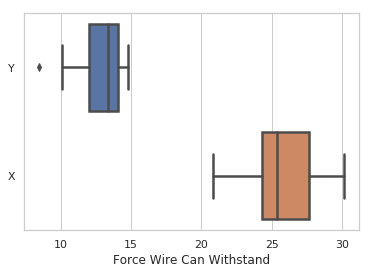

In [147]:
wires = pd.DataFrame(data={"X":xSamples,"Y":ySamples})
sns.set(style="whitegrid")
ax = sns.boxplot( data=wires, orient='h', linewidth=2.5, order=["Y","X"])
ax.set(xlabel='Force Wire Can Withstand')
plt.show()

# $D)$ Advice for the company <br/><br/><br/> Keep the current wires. Already meet the requirements lowerbound of $\mu_X \approx 25.511$.